In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta

In [60]:
dates = {'Preprint and guidance issued':date(2021,4,21),'Paper published':date(2021,8,10), 'Guidance revised':date(2021,12,14)}

In [5]:
df = pd.read_csv("released_outputs/output/monthly_prescription_counts.csv")


In [58]:
df[df['Month of first positive test']== 'All']

,Count of budesonide prescriptions,Count of patients,Month of first positive test
0,0,133561,All
1,1,467,All
2,2,30,All
3,3,<10,All
4,4,<10,All


In [ ]:
df_monthly = df[df['Month of first positive test']!= 'All']

In [10]:
df_monthly['Month of first positive test'] = pd.to_datetime(df_monthly['Month of first positive test'])

<ipython-input-10-c1b3ca01db4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly['Month of first positive test'] = pd.to_datetime(df_monthly['Month of first positive test'])


In [14]:
df_monthly['Count of patients'] = df_monthly['Count of patients'].apply(lambda x: int(x) if x !='<10' else -1)

<ipython-input-14-c99156a930fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly['Count of patients'] = df_monthly['Count of patients'].apply(lambda x: int(x) if x !='<10' else -1)


In [33]:
df_monthly.pivot_table(columns='Month of first positive test',index='Count of budesonide prescriptions',values='Count of patients',fill_value=0)

Month of first positive test,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
Count of budesonide prescriptions,,,,,,,,,,
0,154,970,517,1855,10967,18327,18006,29972,22101,30692
1,0,0,-1,10,42,92,70,138,78,37
2,0,0,0,0,-1,-1,-1,-1,-1,-1
3,0,0,0,0,0,0,0,-1,0,0
4,0,0,0,0,0,-1,0,0,0,0


In [41]:
df_monthly_totals = pd.DataFrame(df_monthly[df_monthly['Count of patients']>0].groupby('Month of first positive test')['Count of patients'].sum()).reset_index()
df_monthly_totals

,Month of first positive test,Count of patients
0,2021-03-31,154
1,2021-04-30,970
2,2021-05-31,517
3,2021-06-30,1865
4,2021-07-31,11009
5,2021-08-31,18419
6,2021-09-30,18076
7,2021-10-31,30110
8,2021-11-30,22179
9,2021-12-31,30729


In [45]:
df_monthly_totals.dtypes

Month of first positive test    datetime64[ns]
Count of patients                        int64
dtype: object

In [52]:
df_monthly_with_counts = df_monthly.merge(df_monthly_totals,how='inner',on='Month of first positive test',suffixes=['','_total'])
df_monthly_with_counts['percentage'] = df_monthly_with_counts.apply(lambda x: float(-1) if x['Count of patients'] == -1 else 100 * float(x['Count of patients'])/float(x['Count of patients_total']),axis=1)
df_monthly_with_counts

,Count of budesonide prescriptions,Count of patients,Month of first positive test,Count of patients_total,percentage
0,0,154,2021-03-31,154,100.000000
1,0,970,2021-04-30,970,100.000000
2,0,517,2021-05-31,517,100.000000
3,1,-1,2021-05-31,517,-1.000000
4,0,1855,2021-06-30,1865,99.463807
5,1,10,2021-06-30,1865,0.536193
6,0,10967,2021-07-31,11009,99.618494
7,1,42,2021-07-31,11009,0.381506
8,2,-1,2021-07-31,11009,-1.000000
9,0,18327,2021-08-31,18419,99.500516


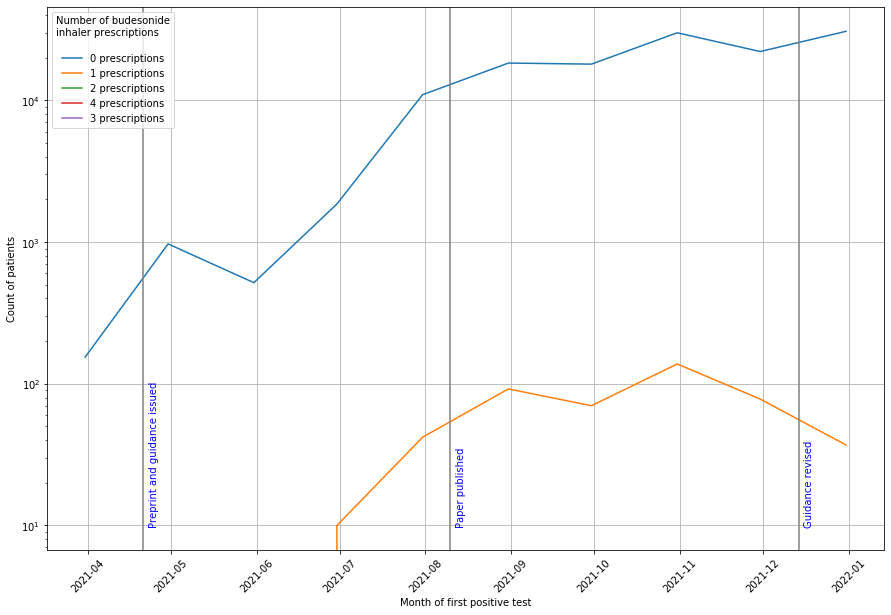

In [77]:

plt.rcParams["figure.figsize"] = (15,10)
for count in df_monthly['Count of budesonide prescriptions'].drop_duplicates():
    plt.plot('Month of first positive test','Count of patients',data=df_monthly[df_monthly['Count of budesonide prescriptions'] == count],label=f"{count} prescriptions")
for label,dt in dates.items():
    plt.axvline(dt,color='grey')
    plt.text(x=(dt+timedelta(days=2)),y=10,s=label,rotation=90,size=10,color='blue')
plt.yscale('log')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Month of first positive test')
plt.ylabel('Count of patients')
plt.legend(title='Number of budesonide\ninhaler prescriptions\n')


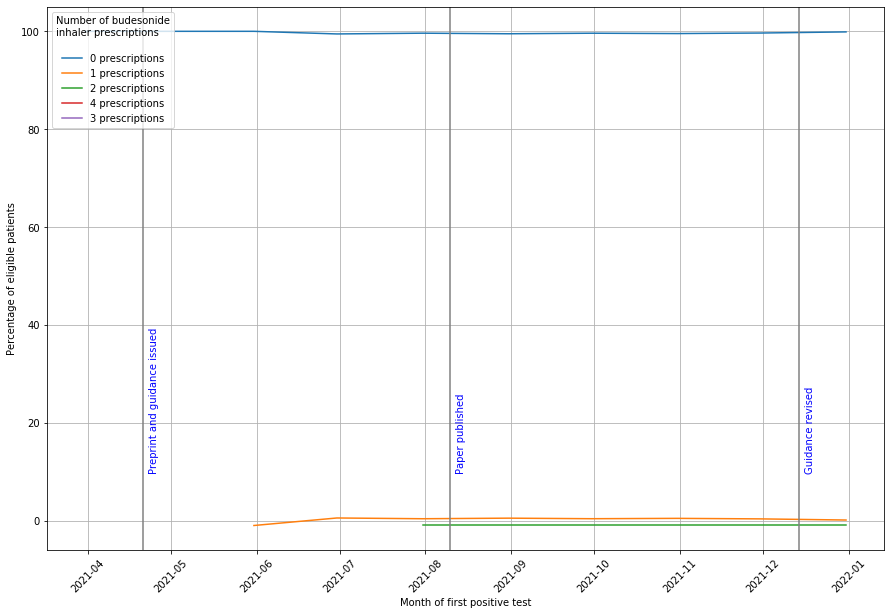

In [83]:

plt.rcParams["figure.figsize"] = (15,10)
for count in df_monthly['Count of budesonide prescriptions'].drop_duplicates():
    plt.plot('Month of first positive test','percentage',data=df_monthly_with_counts[df_monthly_with_counts['Count of budesonide prescriptions'] == count],label=f"{count} prescriptions")
for label,dt in dates.items():
    plt.axvline(dt,color='grey')
    plt.text(x=(dt+timedelta(days=2)),y=10,s=label,rotation=90,size=10,color='blue')
plt.yscale('linear')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Month of first positive test')
plt.ylabel('Percentage of eligible patients')
plt.legend(title='Number of budesonide\ninhaler prescriptions\n', loc='upper left')

#